In [19]:
import networkx as nx
import time 
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np
import requests
import fiona
import pandas as pd
import geopandas as gpd

from descartes import PolygonPatch
from shapely.geometry import shape,Point, LineString, Polygon

import config

ox.config(use_cache=True, log_console=True)
ox.__version__

'0.9'

## Load the metro stop 
GTFS data from transitfeed.com https://transitfeeds.com/p/valley-metro/68

In [20]:
Phx_transp = pd.read_csv('../data/Transport/gtfs_phx/stops.txt')
Phx_metrostops = gpd.GeoDataFrame(Phx_transp)

In [21]:
#define geometry
Phx_metrostops[['stop_lat', 'stop_lon']]  = Phx_metrostops[['stop_lat', 'stop_lon']].astype(float)
Phx_metrostops['geometry'] = Phx_metrostops.apply(lambda row: Point((row['stop_lon'], row['stop_lat'])), axis=1)

In [22]:
Phx_metrostops.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,geometry
0,100,16619.0,Bell Rd & 44th St,NaN,33.640488,-111.986041,NaN,NaN,0,NaN,POINT (-111.9860407 33.64048784)
1,1002,15234.0,Alice Av & 66th Dr,NaN,33.563533,-112.200947,NaN,NaN,0,NaN,POINT (-112.2009471 33.56353253)
2,10021,16877.0,3rd St & Taylor St,NaN,33.453085,-112.070037,NaN,NaN,0,NaN,POINT (-112.070037 33.45308499999999)
3,1003,13532.0,Atlanta Av & 11th Av,NaN,33.400036,-112.085804,NaN,NaN,0,NaN,POINT (-112.0858039 33.4000364)
4,1004,14926.0,Baseline Rd & 19th Av,NaN,33.377644,-112.098529,NaN,NaN,0,NaN,POINT (-112.0985289 33.377644)


## Load the OSM streetnetwork

In [23]:
place = 'Phoenix, Arizona, USA'

In [24]:
Phx_osm_all = ox.load_graphml('{studyregion}_all{suffix}.graphml'.format(studyregion = place, suffix = config.time), folder = config.OSM_data_loc)
Phx_osm_all_gdfs = ox.graph_to_gdfs(Phx_osm_all, nodes=False, edges=True, fill_edge_geometry=True)

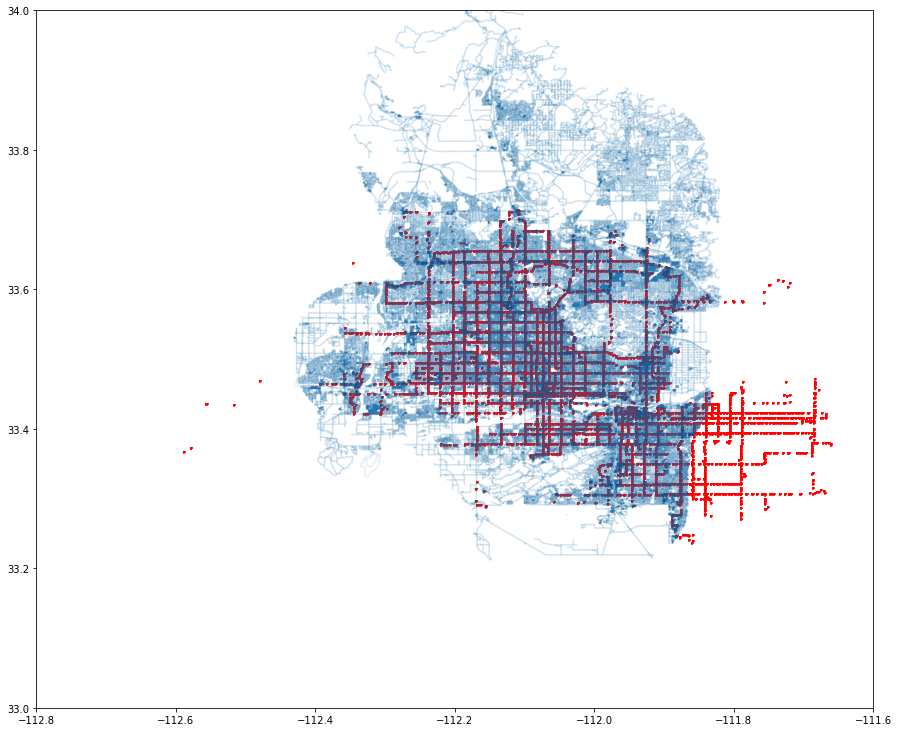

In [26]:
#plot metro stops with OSM all street network
fig, ax = plt.subplots(figsize=(15, 15))
ax = Phx_osm_all_gdfs.plot(ax=ax, alpha=0.1)
ax = Phx_metrostops.plot(ax=ax, color='red', marker='+', markersize=9)
ax.set_ylim((33,34))
ax.set_xlim((-112.8, -111.6))
#ax.set_axis_off()
#fig.suptitle('Meto stops', fontsize=14, fontweight='bold')
#fig.text(0.1, 0, 'Note: OSM street network')
plt.show()